In [1]:
"""
1. Import Libraries
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

sns.set_theme(style="whitegrid")


In [2]:
"""
2. Load Cleaned Data
Each CSV file contains cleaned solar data for one country.
We add a 'Country' column to each and then concatenate them.
"""
benin = pd.read_csv('../data/benin_clean.csv')
sl = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sl['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sl, togo], ignore_index=True)

print("✅ Data loaded successfully!")
print(df.head())


✅ Data loaded successfully!
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB Country  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   Benin  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   Benin  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   Benin  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   Benin  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   Benin  


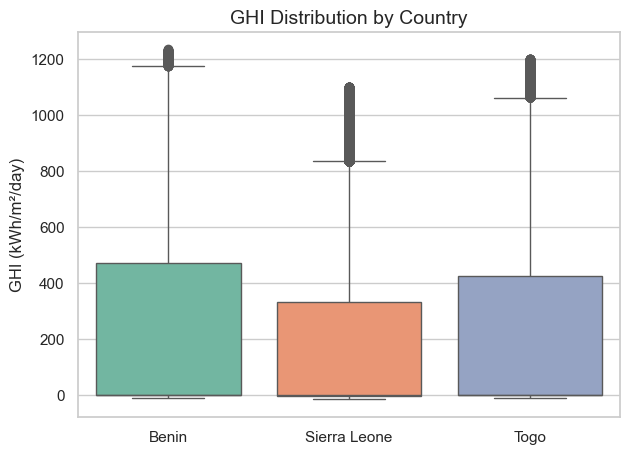

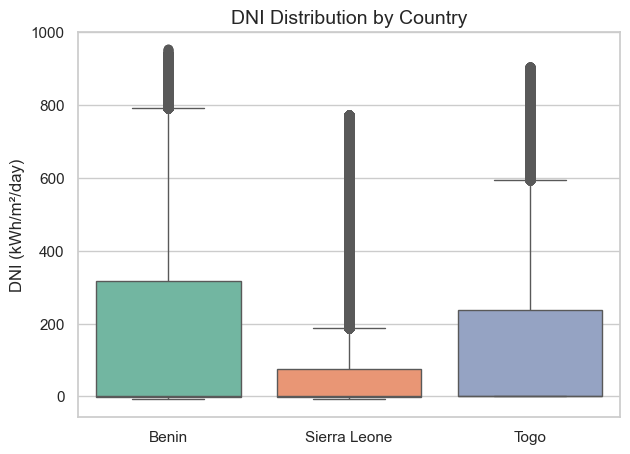

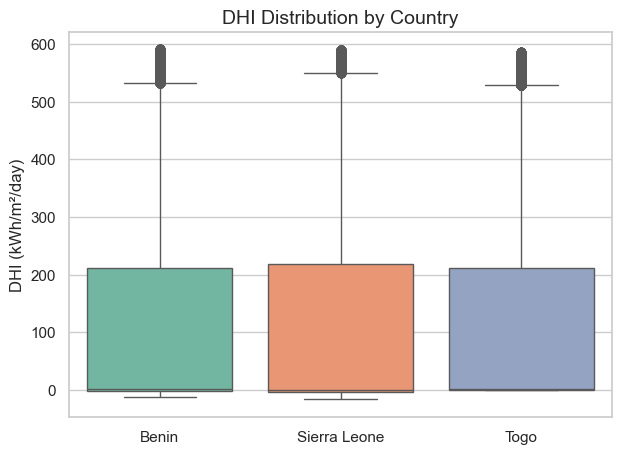

In [3]:
"""
3. Metric Comparison (Boxplots)
We compare GHI, DNI, and DHI distributions side-by-side across countries.
"""
metrics = ['GHI', 'DNI', 'DHI']

for m in metrics:
    plt.figure(figsize=(7,5))
    sns.boxplot(
        x='Country',
        y=m,
        hue='Country',          
        data=df,
        palette='Set2',
        legend=False          
    )
    plt.title(f'{m} Distribution by Country', fontsize=14)
    plt.xlabel('')
    plt.ylabel(f'{m} (kWh/m²/day)')
    plt.show()


In [4]:
"""
4. Summary Table (Mean, Median, and Standard Deviation)
We summarize central tendency and variability for each metric per country.
"""
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(3)

print("\n📊 Summary Statistics:")
display(summary)



📊 Summary Statistics:


GHI                      DNI                      DHI  \
                 mean median      std     mean median      std     mean   
Country                                                                   
Benin         236.235    0.7  328.289  166.897   -0.1  262.082  111.656   
Sierra Leone  185.000   -0.4  279.019  104.129   -0.1  200.954  108.104   
Togo          223.860    0.5  317.306  147.976    0.0  247.684  112.781   

                              
             median      std  
Country                       
Benin           0.5  153.100  
Sierra Leone   -0.6  153.692  
Togo            1.5  151.572

In [5]:
"""
5. Statistical Testing
We assess whether the observed differences in GHI between countries are statistically significant.
Both One-way ANOVA (parametric) and Kruskal–Wallis (nonparametric) tests are run.
"""
# One-way ANOVA for GHI
anova_res = f_oneway(
    df.loc[df['Country']=='Benin', 'GHI'],
    df.loc[df['Country']=='Sierra Leone', 'GHI'],
    df.loc[df['Country']=='Togo', 'GHI']
)

print("\n🔹 ANOVA Test on GHI:")
print(f"F-statistic = {anova_res.statistic:.3f}, p-value = {anova_res.pvalue:.4f}")

# Kruskal–Wallis test
kruskal_res = kruskal(
    df.loc[df['Country']=='Benin', 'GHI'],
    df.loc[df['Country']=='Sierra Leone', 'GHI'],
    df.loc[df['Country']=='Togo', 'GHI']
)

print("\n🔹 Kruskal–Wallis Test on GHI:")
print(f"H-statistic = {kruskal_res.statistic:.3f}, p-value = {kruskal_res.pvalue:.4f}")



🔹 ANOVA Test on GHI:
F-statistic = 3833.184, p-value = 0.0000

🔹 Kruskal–Wallis Test on GHI:
H-statistic = 6548.534, p-value = 0.0000


### Statistical Test Summary
- ANOVA (GHI): F = 3833.18, p < 0.001 → highly significant difference in mean GHI across Benin, Sierra Leone, and Togo.

- Kruskal–Wallis (GHI): H = 6548.53, p < 0.001 → confirms that the distributions of GHI differ strongly between countries.

- Both ANOVA and Kruskal–Wallis tests yield p-values < 0.001, indicating extremely significant differences in solar irradiance (GHI) among Benin, Sierra Leone, and Togo. These results confirm that the countries have distinct solar potential levels rather than random variation.

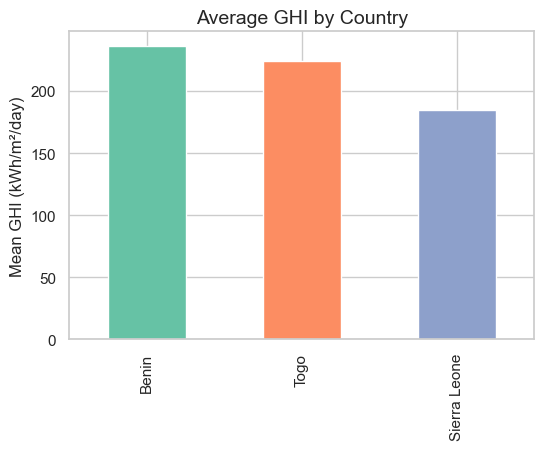

In [6]:
"""
6. Visual Summary (Bonus)
A simple bar chart ranking countries by average GHI for quick comparison.
"""
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
avg_ghi.plot(kind='bar', color=sns.color_palette('Set2'))
plt.title('Average GHI by Country', fontsize=14)
plt.ylabel('Mean GHI (kWh/m²/day)')
plt.xlabel('')
plt.show()


# Key Observations
- Benin shows the highest average GHI, indicating the strongest solar potential among the three countries.

- Togo has a slightly lower average GHI than Benin, placing it in the middle in terms of solar resource.

- Sierra Leone has the lowest average GHI, suggesting comparatively less solar energy potential.